In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
###################################
# PRVI PRIMER - SA SAJTA POSTUPAK #
###################################

In [3]:
x1 = np.array([958, 38, 1])
y1 = np.array([933, 33, 1])
x2 = np.array([1117, 111, 1])
y2 = np.array([1027, 132, 1])
x3 = np.array([874, 285, 1])
y3 = np.array([692, 223, 1])
x4 = np.array([707, 218, 1])
y4 = np.array([595, 123, 1])
x9 = np.array([292, 569, 1])
y9 = np.array([272, 360, 1])
x10 = np.array([770, 969, 1])
y10 = np.array([432, 814, 1])
x11 = np.array([770, 1465, 1])
y11 = np.array([414, 1284, 1])
x12 = np.array([317, 1057, 1])
y12 = np.array([258, 818, 1])

In [4]:
xx = np.array([x1, x2, x3, x4, x9, x10, x11, x12])
yy = np.array([y1, y2, y3, y4, y9, y10, y11, y12])

In [5]:
# Pravi jednu jednacinu oblika y^T * F * x = 0
def equation(x, y):
    a1 = x[0]
    a2 = x[1]
    a3 = x[2]
    b1 = y[0]
    b2 = y[1]
    b3 = y[2]
    
    return np.matrix([[a1*b1, a2*b1, a3*b1, a1*b2, a2*b2, a3*b2, a1*b3, a2*b3, a3*b3]])

In [6]:
# Pravi matricu formata 8x9 koja predstavlja 8 jedn dobijenih iz korespodencija
def MapThread(xx, yy):
    matrix = equation(xx[0], yy[0])
    n = len(xx)
    for i in range(1, n):
        pom = equation(xx[i], yy[i])
        matrix = np.concatenate((matrix, pom), axis=0)
        
    return matrix

In [7]:
matrix = MapThread(xx, yy)
print(matrix)

[[ 893814   35454     933   31614    1254      33     958      38       1]
 [1147159  113997    1027  147444   14652     132    1117     111       1]
 [ 604808  197220     692  194902   63555     223     874     285       1]
 [ 420665  129710     595   86961   26814     123     707     218       1]
 [  79424  154768     272  105120  204840     360     292     569       1]
 [ 332640  418608     432  626780  788766     814     770     969       1]
 [ 318780  606510     414  988680 1881060    1284     770    1465       1]
 [  81786  272706     258  259306  864626     818     317    1057       1]]


In [8]:
U, D, V = LA.svd(matrix)
# F je poslednja kolona matrice V

print("Matrica U: \n", U)
print("\nMatrica D: \n", np.diag(D))
print("\nPrva kolona matrice V: \n", V[:, 0])

F = V[-1].reshape(3, 3)
print("\nFundamentalna matrica: \n", F)

Matrica U: 
 [[-1.09394068e-01  5.32139670e-01 -3.64946637e-01 -1.36312961e-01
  -1.49495421e-01 -6.53619606e-01 -9.18812653e-02 -3.08355966e-01]
 [-1.68966605e-01  6.77458340e-01 -1.11750618e-01 -1.69426472e-01
   4.19268723e-01  4.10465738e-01  1.74116778e-01  3.11001474e-01]
 [-1.39179445e-01  3.42345269e-01  3.53682212e-01  3.01646836e-01
  -2.79327701e-01  4.15513984e-01 -1.70542346e-01 -6.06289000e-01]
 [-8.31304292e-02  2.43228315e-01  1.41759671e-01  3.56438625e-01
  -6.08400312e-01 -9.88999918e-02 -2.91646207e-02  6.37183096e-01]
 [-1.01823594e-01  4.42160678e-04  9.40415676e-02  5.16507659e-01
   1.98569838e-01 -2.33841121e-01  7.75762093e-01 -1.34496495e-01]
 [-4.11395505e-01  1.07048208e-02  6.36633110e-01 -4.98505607e-03
   4.04031170e-01 -3.78085840e-01 -3.25205217e-01  1.15603008e-01]
 [-8.03053905e-01 -2.45181355e-01 -1.23691934e-01 -3.41262937e-01
  -2.93287002e-01  1.27656311e-01  2.43239858e-01 -4.18498951e-02]
 [-3.29684329e-01 -1.45906088e-01 -5.28860674e-01  5.927

In [9]:
print("Determinanta fundamentalne matrice:\n", LA.det(F))

Determinanta fundamentalne matrice:
 1.7139674179611366e-12


In [10]:
# Funkcija za proveru da li je y^T * F * x = 0
def test(x, y):
    pom = np.dot(np.dot(y, F), x)
    return pom[0, 0]

In [11]:
list = []
for i in range(len(xx)):
    element = test(xx[i], yy[i])
    list.append(element)
print("Testiranje da li vazi uslov:\n", list)

Testiranje da li vazi uslov:
 [-3.3306690738754696e-16, -5.928590951498336e-14, -2.220446049250313e-16, -1.84297022087776e-14, 1.6431300764452317e-14, 7.815970093361102e-14, 1.1457501614131615e-13, 3.774758283725532e-14]


In [12]:
SVDF = LA.svd(F)

In [13]:
U, DD, V = SVDF

In [14]:
print("Matrica U:\n", U)
print("\nMatrica DD:\n", np.diag(DD))
print("\nTransponovana matrica V:\n", np.transpose(V))

Matrica U:
 [[ 1.86610315e-03  6.01930967e-01 -7.98545947e-01]
 [-2.77794482e-03 -7.98541135e-01 -6.01933832e-01]
 [-9.99994400e-01  3.34158720e-03  1.81970886e-04]]

Matrica DD:
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.88646915e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.73364969e-07]]

Transponovana matrica V:
 [[-3.96235743e-04  1.77651525e-01 -9.84093379e-01]
 [ 2.72716243e-03 -9.84089605e-01 -1.77651942e-01]
 [-9.99996203e-01 -2.75417454e-03 -9.45530903e-05]]


In [15]:
V = np.transpose(V)

In [16]:
# Da bi se nasao epipol e1 treba resiti sistem F * e1 = 0
# To se resava preko SVD dekompozije
# Treca kolona transponovane matrice V je bas taj trazeni epipol
# Ona odgovara najmanjoj sopstvenoj vrednosti matrice
e1 = np.transpose(V[:, -1])
print("Epipol e1: \n", e1)

Epipol e1: 
 [[-9.84093379e-01 -1.77651942e-01 -9.45530903e-05]]


In [17]:
e1 = e1 / e1[0, -1]
print("Afine koordinate epipola e1:\n", e1)

Afine koordinate epipola e1:
 [[1.04078394e+04 1.87885919e+03 1.00000000e+00]]


In [18]:
# Za epipol e2, treba da se resi F^T * e2 = 0, ali 
# F^T = (UDV^T)^T = VDU^T
# Posto je (U, D, V) SVD dekompozicija od F
# onda je (V, D, U) SVD dekompozicija of F^T, pa je e2 treca
# kolona matrica U
e2 = np.transpose(U[:, -1])
print("Epipol e2:\n", e2)

Epipol e2:
 [[-7.98545947e-01 -6.01933832e-01  1.81970886e-04]]


In [19]:
e2 = e2 / e2[0, -1]
print("Afine koordinate epipola e2:\n", e2)

Afine koordinate epipola e2:
 [[-4.38831707e+03 -3.30785789e+03  1.00000000e+00]]


In [20]:
# Postizanje uslova det(F) = 0
DD1 = np.diag([1, 1, 0]) * DD
print("DD1: \n", DD1)

DD1: 
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.88646915e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [21]:
FF1 = np.dot(np.dot(U, DD1), np.transpose(V))
print("F:\n", F)
print("\nFF1:\n", FF1)

F:
 [[ 4.54020258e-07 -7.42529108e-07 -1.86611244e-03]
 [-1.99099442e-07  2.11775653e-07  2.77795603e-03]
 [ 3.96239362e-04 -2.72717967e-03  9.99990603e-01]]

FF1:
 [[ 3.17782475e-07 -7.67123224e-07 -1.86611245e-03]
 [-3.01793759e-07  1.93236919e-07  2.77795602e-03]
 [ 3.96239393e-04 -2.72717967e-03  9.99990603e-01]]


In [22]:
print("det(F):\n", LA.det(F))
print("\ndet(FF1):\n", LA.det(FF1))

det(F):
 1.7139674179611366e-12

det(FF1):
 6.474662161627341e-28


In [23]:
# F i FF1 imaju iste matrice U i V u SVD dekompoziciji
# pa samim tim imaju i iste epipolove
# Nadalje se koristi FF1

In [24]:
# Preostale tacke koje se vide
x6 = np.array([1094, 536, 1])
y6 = np.array([980, 535, 1])
x7 = np.array([862, 729, 1])
y7 = np.array([652, 638, 1])
x8 = np.array([710, 648, 1])
y8 = np.array([567, 532, 1])
x14 = np.array([1487, 598, 1])
y14 = np.array([1303, 700, 1])
x15 = np.array([1462, 1079, 1])
y15 = np.array([1257, 1165, 1])
y13 = np.array([1077, 269, 1])

In [25]:
# Odredjivanje nevidljivih tacaka
x5 = np.cross(np.cross(np.cross(np.cross(x4, x8), np.cross(x6, x2)), x1), np.cross(np.cross(np.cross(x1, x4), np.cross(x3, x2)), x8))
x5 = x5 / x5[2]
x5.round()

array([945., 480.,   1.])

In [26]:
x13 = np.cross(np.cross(np.cross(np.cross(x9, x10), np.cross(x11, x12)), x14), np.cross(np.cross(np.cross(x11, x15), np.cross(x10, x14)), x9))
x13 = x13 / x13[2]
x13.round()

array([-41., 242.,   1.])

In [27]:
x16 = np.cross(np.cross(np.cross(np.cross(x10, x14), np.cross(x11, x15)), x12), np.cross(np.cross(np.cross(x9, x10), np.cross(x11, x12)), x15))
x16 = x16 / x16[2]
x16.round()

array([ 35., 234.,   1.])

In [28]:
y5 = np.cross(np.cross(np.cross(np.cross(y4, y8), np.cross(y6, y2)), y1), np.cross(np.cross(np.cross(y1, y4), np.cross(y3, y2)), y8))
y5 = y5 / y5[2]
y5.round()

array([890., 440.,   1.])

In [29]:
y16 = np.cross(np.cross(np.cross(np.cross(y10, y14), np.cross(y11, y15)), y12), np.cross(np.cross(np.cross(y12, y11), np.cross(y9, y10)), y15))
y16 = y16 / y16[2]
y16.round()

array([-255., -609.,    1.])

In [30]:
# Pravi se kanonska matrica kamere
eye = np.eye(3)
column = np.matrix([0, 0, 0])
T1 = np.concatenate((eye, np.transpose(column)), axis = 1)
print("Matrica T1:\n", T1)

Matrica T1:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [31]:
# Matrica vektorskog mnozenja
def vec(x):
    p1 = x[0, 0]
    p2 = x[0, 1]
    p3 = x[0, 2]
    matrix = np.matrix([[0, -p3, p2], [p3, 0, -p1], [-p2, p1, 0]])
    return matrix

In [32]:
E2 = vec(e2)
print("E2:\n", E2)

E2:
 [[ 0.00000000e+00 -1.00000000e+00 -3.30785789e+03]
 [ 1.00000000e+00  0.00000000e+00  4.38831707e+03]
 [ 3.30785789e+03 -4.38831707e+03  0.00000000e+00]]


In [33]:
# Matrica kamere T2
firstPart = E2 * FF1
print("E2 * FF1:\n", firstPart)
print("\ne2:\n", e2)
T2 = np.concatenate((firstPart, np.transpose(e2)), axis=1)
print("\nMatrica T2:\n", T2)

E2 * FF1:
 [[-1.31070330e+00  9.02112258e+00 -3.30782958e+03]
 [ 1.73882441e+00 -1.19677298e+01  4.38827396e+03]
 [ 2.37554597e-03 -3.38551948e-03 -1.83633866e+01]]

e2:
 [[-4.38831707e+03 -3.30785789e+03  1.00000000e+00]]

Matrica T2:
 [[-1.31070330e+00  9.02112258e+00 -3.30782958e+03 -4.38831707e+03]
 [ 1.73882441e+00 -1.19677298e+01  4.38827396e+03 -3.30785789e+03]
 [ 2.37554597e-03 -3.38551948e-03 -1.83633866e+01  1.00000000e+00]]


In [34]:
# Za svaku tacku dobijemo sistem od cetiri jednacine sa 4 homogene
# nepoznate. Uzimaju se 3 jednacine
def jednacine(x, y, T1, T2):
    niz = np.array([x[1] * T1[2] - x[2] * T1[1], -x[0] * T1[2] + x[2] * T1[0], y[1] * T2[2] - y[2] * T2[1], -y[0] * T2[2] + y[2] * T2[0]])
    return np.matrix(niz)

In [35]:
print("Matrica koja se dobija iz jednacina:\n", jednacine(x1, y1, T1, T2))

Matrica koja se dobija iz jednacina:
 [[ 0.00000000e+00 -1.00000000e+00  3.80000000e+01  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00 -9.58000000e+02  0.00000000e+00]
 [-1.66043139e+00  1.18560077e+01 -4.99426572e+03  3.34085789e+03]
 [-3.52708769e+00  1.21798123e+01  1.38252101e+04 -5.32131707e+03]]


In [36]:
s, v, d = LA.svd(jednacine(x1, y1, T1, T2))
print("SVD dekompozicija jednacina:")
print(s)
print("\n", np.diag(v))
print("\n", d)

SVD dekompozicija jednacina:
[[-0.00219542 -0.01141793  0.23727863 -0.97137205]
 [ 0.05534849  0.28807879 -0.9278848  -0.23016722]
 [ 0.36943898 -0.89537502 -0.24359204 -0.04981297]
 [-0.92760259 -0.33938741 -0.15294303 -0.03127383]]

 [[1.59632182e+04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.28531119e+03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.98847967e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.71509415e-02]]

 [[ 1.69994298e-04 -4.33230845e-04 -9.22275460e-01  3.86533000e-01]
 [ 2.31215349e-03 -1.14663517e-02 -3.86501654e-01 -9.22214535e-01]
 [ 3.21270959e-03 -9.99928919e-01  4.83501792e-03  1.04143040e-02]
 [-9.99992152e-01 -3.23909226e-03 -1.03490733e-03 -2.03315097e-03]]


In [37]:
print("Poslednja vrsta poslednje matrice SVD dekompozicije:\n"
      , LA.svd(jednacine(x1, y1, T1, T2))[2][3])

Poslednja vrsta poslednje matrice SVD dekompozicije:
 [[-0.99999215 -0.00323909 -0.00103491 -0.00203315]]


In [38]:
def uAfine(x):
    x = x / x[3]
    return x[:-1]

In [39]:
# Fja vraca 3D koordinate rekonstruisane tacke, preko prethodnog principa
def triD(x, y, T1, T2):
    mat = np.transpose(LA.svd(jednacine(x, y, T1, T2))[2][3])
    niz = np.array(mat)
    return uAfine(niz)

In [40]:
print("3D koordinate za x2, y2:\n", triD(x2, y2, T1, T2))

3D koordinate za x2, y2:
 [[5.04614316e+02]
 [2.83555175e+01]
 [4.47171241e-01]]


In [41]:
slika1 = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16])
slika2 = np.array([y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16])

In [42]:
# Rekonstrukcija 3D koordinata tacaka
def MapThread2(xx, yy):
    rekonstruisane = []
    for i in range(len(xx)):
        tmp = triD(xx[i], yy[i], T1, T2)
        rekonstruisane.append(tmp)
        print(f"\n{i}. rekonstrukcija:\n{tmp}")
    return rekonstruisane

In [43]:
rekonstruisane = MapThread2(slika1, slika2)


0. rekonstrukcija:
[[491.84353036]
 [  1.59313908]
 [  0.50901647]]

1. rekonstrukcija:
[[5.04614316e+02]
 [2.83555175e+01]
 [4.47171241e-01]]

2. rekonstrukcija:
[[462.90170064]
 [132.73681428]
 [  0.52557536]]

3. rekonstrukcija:
[[451.53824135]
 [124.86509964]
 [  0.63476922]]

4. rekonstrukcija:
[[383.89190414]
 [128.75144682]
 [  0.3869947 ]]

5. rekonstrukcija:
[[4.02597956e+02]
 [1.34081479e+02]
 [3.52730610e-01]]

6. rekonstrukcija:
[[341.96774372]
 [238.66413756]
 [  0.38548329]]

7. rekonstrukcija:
[[318.68122559]
 [246.47859012]
 [  0.43737882]]

8. rekonstrukcija:
[[204.98231907]
 [390.5749795 ]
 [  0.69865921]]

9. rekonstrukcija:
[[299.38198471]
 [356.35677875]
 [  0.38590733]]

10. rekonstrukcija:
[[2.18131111e+02]
 [3.92907417e+02]
 [2.81440333e-01]]

11. rekonstrukcija:
[[1.33994812e+02]
 [4.34968096e+02]
 [4.20089046e-01]]

12. rekonstrukcija:
[[-7.17627929e+03]
 [-1.32220757e+03]
 [-3.37277966e-01]]

13. rekonstrukcija:
[[4.58570726e+02]
 [1.19093832e+02]
 [2.965276

In [44]:
# Mnozi se z koordinata jer nije radjena normalizacija
dig = np.eye(3)
dig[2][2] = 400
rekonstruisane400 = np.zeros((16, 3))
print("Rekonstruisane400:")
for i in range(len(rekonstruisane)):
    rekonstruisane400[i] = dig.dot(rekonstruisane[i][:,0])
    print(rekonstruisane400[i])

Rekonstruisane400:
[491.84353036   1.59313908 203.60658798]
[504.61431592  28.35551747 178.86849645]
[462.90170064 132.73681428 210.23014481]
[451.53824135 124.86509964 253.90768627]
[383.89190414 128.75144682 154.79788154]
[402.59795558 134.0814793  141.09224395]
[341.96774372 238.66413756 154.19331627]
[318.68122559 246.47859012 174.95152628]
[204.98231907 390.5749795  279.46368408]
[299.38198471 356.35677875 154.36293064]
[218.13111056 392.90741712 112.57613311]
[133.99481211 434.96809643 168.03561831]
[-7176.27929189 -1322.207566    -134.91118642]
[458.57072564 119.09383245 118.611055  ]
[386.63127509 184.15062058  98.41656141]
[-637.3431289   -76.53411512 -215.55655794]


In [45]:
iviceMala = np.array([[1, 2], [2, 3], [3, 4], [4, 1],
                      [5, 6], [6, 7], [7, 8], [8, 5],
                      [1, 5], [2, 6], [3, 7], [4, 8]])

iviceVelika = np.array([[9, 10], [10, 11], [11, 12], [12,  9], 
                        [13, 14], [14, 15], [15, 16], [16, 13],
                        [9, 13], [10, 14], [11, 15], [12, 16]])

<IPython.core.display.Javascript object>


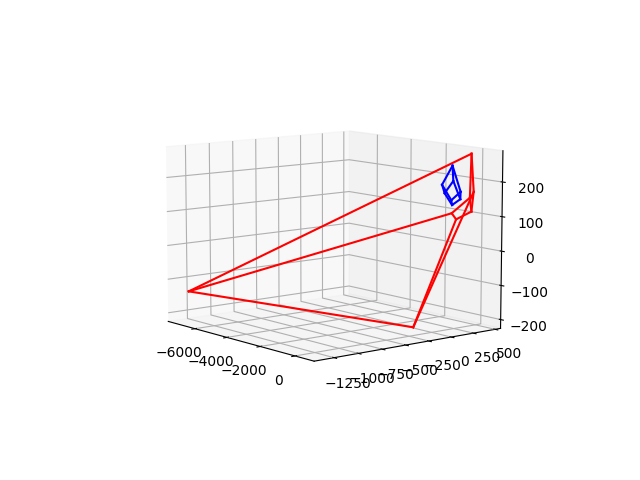

In [46]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for ivica in iviceVelika:
    ax.plot3D([rekonstruisane400[ivica[0] - 1][0], rekonstruisane400[ivica[1] - 1][0]], [rekonstruisane400[ivica[0] - 1][1], rekonstruisane400[ivica[1] - 1][1]], [rekonstruisane400[ivica[0] - 1][2], rekonstruisane400[ivica[1] - 1][2]], 'red')

for ivica in iviceMala:
    ax.plot3D([rekonstruisane400[ivica[0] - 1][0], rekonstruisane400[ivica[1] - 1][0]], [rekonstruisane400[ivica[0] - 1][1], rekonstruisane400[ivica[1] - 1][1]], [rekonstruisane400[ivica[0] - 1][2], rekonstruisane400[ivica[1] - 1][2]], 'blue')


In [47]:
####################################
# DRUGI PRIMER - LEVA I DESNA 2020 #
####################################

In [48]:
# Leva slika
x1 = np.array([814, 110, 1])
x2 = np.array([953, 159, 1])
x3 = np.array([988, 123, 1])
x4 = np.array([854, 78, 1])
x5 = np.array([791, 303, 1])
x6 = np.array([913, 358, 1])
x7 = np.array([950, 318, 1])
# x8 - nevidljiva
x9 = np.array([322, 345, 1])
x10 = np.array([454, 368, 1])
x11 = np.array([509, 272, 1])
x12 = np.array([386, 248, 1])
x13 = np.array([364, 558, 1])
x14 = np.array([478, 582, 1])
x15 = np.array([526, 486, 1])
# x16 - nevidljiva
x17 = np.array([137, 551, 1])
x18 = np.array([434, 761, 1])
x19 = np.array([816, 382, 1])
x20 = np.array([549, 251, 1])
x21 = np.array([174, 655, 1])
x22 = np.array([449, 860, 1])
x23 = np.array([806, 487, 1])
# x24 - nevidljiva

In [49]:
# Desna slika
y1 = np.array([912, 445, 1])
y2 = np.array([812, 559, 1])
y3 = np.array([918, 611, 1])
y4 = np.array([1014, 491, 1])
# y5 - nevidljiva
y6 = np.array([772, 769, 1])
y7 = np.array([864, 823, 1])
y8 = np.array([956, 702, 1])
y9 = np.array([296, 74, 1])
y10 = np.array([252,  119,  1])
y11 = np.array([371,  137,  1])
y12 = np.array([414,  88,  1])
# y13 - nevidljiva
y14 = np.array([287,  324,  1]) 
y15 = np.array([397,  342,  1])
y16 = np.array([433,  288,  1])
# y17 - nevidljiva
y18 = np.array([135,  319,  1])
y19 = np.array([527,  529,  1])
y20 = np.array([744,  348,  1])
# y21 - nevidljiva
y22 = np.array([162,  425,  1])
y23 = np.array([538,  642,  1])
y24 = np.array([733,  454,  1])

In [50]:
x8 = np.cross(np.cross(np.cross(np.cross(x1, x5), np.cross(x7, x3)), x4), np.cross(np.cross(np.cross(x4, x1), np.cross(x2, x3)), x5))
x8 = x8 / x8[2]
x8.round()

array([829., 265.,   1.])

In [51]:
x16 = np.cross(np.cross(np.cross(np.cross(x9, x13), np.cross(x15, x11)), x12), np.cross(np.cross(np.cross(x12, x9), np.cross(x10, x11)), x13))
x16 = x16 / x16[2]
x16.round()

array([418., 462.,   1.])

In [52]:
x24 = np.cross(np.cross(np.cross(np.cross(x17, x21), np.cross(x23, x19)), x20), np.cross(np.cross(np.cross(x20, x17), np.cross(x18, x19)), x21))
x24 = x24 / x24[2]
x24.round()

array([555., 351.,   1.])

In [53]:
y5 = np.cross(np.cross(np.cross(np.cross(y4, y8), np.cross(y6, y2)), y1), np.cross(np.cross(np.cross(y4, y1), np.cross(y2, y3)), y8))
y5 = y5 / y5[2]
y5.round()

array([865., 656.,   1.])

In [54]:
y13 = np.cross(np.cross(np.cross(np.cross(y12, y16), np.cross(y14, y10)), y9), np.cross(np.cross(np.cross(y12, y9), np.cross(y10, y11)), y16))
y13 = y13 / y13[2]
y13.round()

array([324., 262.,   1.])

In [55]:
y17 = np.cross(np.cross(np.cross(np.cross(y19, y18), np.cross(y23, y22)), y24), np.cross(np.cross(np.cross(y20, y19), np.cross(y23, y24)), y22))
y17 = y17 / y17[2]
y17.round()

array([403., 299.,   1.])

In [56]:
y21 = np.cross(np.cross(np.cross(np.cross(y20, y24), np.cross(y22, y18)), y17), np.cross(np.cross(np.cross(y20, y17), np.cross(y18, y19)), y24))
y21 = y21 / y21[2]
y21.round()

array([409., 361.,   1.])

In [57]:
xx = np.array([x1, x2, x3, x4, x6, x7, x9, x10])
yy = np.array([y1, y2, y3, y4, y6, y7, y9, y10])

In [58]:
jed8 = MapThread(xx, yy)

In [59]:
U, D, V = LA.svd(jed8)

In [60]:
print("Matrica U:\n", U)
print("\nMatrica D:\n", np.diag(D))
print("\nPrva kolona matrice V:\n", V[:, 0])

Matrica U:
 [[-0.32946802  0.36943143 -0.30488274 -0.27977294 -0.1863082  -0.53968254
   0.39273698 -0.32176783]
 [-0.38288307  0.12384095  0.15356913  0.38371259  0.25235813 -0.55016004
  -0.31153009  0.45147919]
 [-0.4397823   0.24511652  0.34736105  0.45600557  0.11441191  0.34465912
   0.09111994 -0.52699698]
 [-0.37996102  0.4963538  -0.13048872 -0.41168218 -0.05411626  0.47103267
  -0.26707774  0.35584006]
 [-0.42016765 -0.55305878 -0.09553598 -0.35823232  0.17675424 -0.06344759
  -0.46197127 -0.36255   ]
 [-0.47461358 -0.47993035  0.08207697  0.0483063  -0.3406703   0.14819047
   0.50381049  0.37880998]
 [-0.04420694 -0.03852512 -0.66327823  0.50382837 -0.44816309  0.09403701
  -0.29709882 -0.06942412]
 [-0.05761404 -0.06358695 -0.53849259  0.11207828  0.73310129  0.17486006
   0.33699129  0.09233003]]

Matrica D:
 [[2.48311268e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.16483741e+05 0.0000000

In [61]:
# Fundamentalna matrica
F = V[-1].reshape(3, 3)
print("Fundamentalna matrica F:\n", F)

Fundamentalna matrica F:
 [[-8.54587907e-07 -1.76359397e-06 -5.74816900e-04]
 [-9.44653976e-07 -5.83381768e-07  3.42340633e-03]
 [-7.97167049e-04 -1.52909366e-03  9.99992488e-01]]


In [62]:
list = []
for i in range(len(xx)):
    element = test(xx[i], yy[i])
    list.append(element)
print("Testiranje da li vazi uslov:\n", list)

Testiranje da li vazi uslov:
 [-2.220446049250313e-16, -4.884981308350689e-15, -1.0658141036401503e-14, -1.021405182655144e-14, 1.5987211554602254e-14, 1.021405182655144e-14, -1.7763568394002505e-15, -1.2434497875801753e-14]


In [63]:
print("Determinanta F:\n", LA.det(F))

Determinanta F:
 -1.39103255195199e-12


In [64]:
SVDF = LA.svd(F)
U, DD, V = SVDF

In [65]:
print("Matrica U:\n", U)
print("\nMatrica DD:\n", np.diag(DD))
print("\nTransponovana matrica V:\n", V)

Matrica U:
 [[ 5.74812667e-04  5.08788846e-01 -8.60891155e-01]
 [-3.42340288e-03 -8.60885251e-01 -5.08787642e-01]
 [-9.99993975e-01  3.23963484e-03  1.24694145e-03]]

Matrica DD:
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.78511517e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.40450278e-07]]

Transponovana matrica V:
 [[ 7.97164989e-04  1.52908543e-03 -9.99998513e-01]
 [-3.80994362e-01 -9.24575765e-01 -1.71747326e-03]
 [ 9.24577017e-01 -3.80995165e-01  1.54466500e-04]]


In [66]:
V = np.transpose(V)

In [67]:
e1 = np.transpose(V[:, 2])
print("Epipol e1:\n", e1)

Epipol e1:
 [[ 9.24577017e-01 -3.80995165e-01  1.54466500e-04]]


In [68]:
e1 = e1 / e1[0, 2]
print("Afine koordinate epipola e1:\n", e1)

Afine koordinate epipola e1:
 [[ 5.98561512e+03 -2.46652294e+03  1.00000000e+00]]


In [69]:
e2 = np.transpose(U[:, 2])
print("Epipol e2:\n", e2)

Epipol e2:
 [[-0.86089115 -0.50878764  0.00124694]]


In [70]:
e2 = e2 / e2[0, 2]
print("Afine koordinate e2:\n", e2)

Afine koordinate e2:
 [[-690.40222584 -408.02849332    1.        ]]


In [71]:
# Postizanje uslova det(F) = 0
DD1 = np.diag([1, 1, 0]) * DD
print("DD1: \n", DD1)

DD1: 
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.78511517e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [72]:
FF1 = np.dot(np.dot(U, DD1), np.transpose(V))
print("F:\n", F)
print("\nFF1:\n", FF1)

F:
 [[-8.54587907e-07 -1.76359397e-06 -5.74816900e-04]
 [-9.44653976e-07 -5.83381768e-07  3.42340633e-03]
 [-7.97167049e-04 -1.52909366e-03  9.99992488e-01]]

FF1:
 [[-6.63199061e-07 -1.84246055e-06 -5.74816868e-04]
 [-8.31542953e-07 -6.29992004e-07  3.42340635e-03]
 [-7.97167326e-04 -1.52909355e-03  9.99992488e-01]]


In [73]:
print("det(F):\n", LA.det(F))
print("\ndet(FF1):\n", LA.det(FF1))

det(F):
 -1.39103255195199e-12

det(FF1):
 -5.83852136586141e-28


In [74]:
# F i FF1 imaju iste matrice U i V u SVD dekompoziciji
# pa samim tim imaju i iste epipolove
# Nadalje se koristi FF1

In [75]:
# Pravi se kanonska matrica kamere
eye = np.eye(3)
column = np.matrix([0, 0, 0])
T1 = np.concatenate((eye, np.transpose(column)), axis = 1)
print("Matrica T1:\n", T1)

Matrica T1:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [76]:
E2 = vec(e2)
print("E2:\n", E2)

E2:
 [[   0.           -1.         -408.02849332]
 [   1.            0.          690.40222584]
 [ 408.02849332 -690.40222584    0.        ]]


In [77]:
# Matrica kamere T2
firstPart = E2 * FF1
print("E2 * FF1:\n", firstPart)
print("\ne2:\n", e2)
T2 = np.concatenate((firstPart, np.transpose(e2)), axis=1)
print("\nMatrica T2:\n", T2)

E2 * FF1:
 [[ 3.25267815e-01  6.23914367e-01 -4.08028852e+02]
 [-5.50366760e-01 -1.05569143e+00  6.90396465e+02]
 [ 3.03494992e-04 -3.16828519e-04 -2.59806902e+00]]

e2:
 [[-690.40222584 -408.02849332    1.        ]]

Matrica T2:
 [[ 3.25267815e-01  6.23914367e-01 -4.08028852e+02 -6.90402226e+02]
 [-5.50366760e-01 -1.05569143e+00  6.90396465e+02 -4.08028493e+02]
 [ 3.03494992e-04 -3.16828519e-04 -2.59806902e+00  1.00000000e+00]]


In [78]:
print("Matrica koja se dobija iz jednacina:\n", jednacine(x1, y1, T1, T2))

Matrica koja se dobija iz jednacina:
 [[ 0.00000000e+00 -1.00000000e+00  1.10000000e+02  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00 -8.14000000e+02  0.00000000e+00]
 [ 6.85422031e-01  9.14702742e-01 -1.84653718e+03  8.53028493e+02]
 [ 4.84803821e-02  9.12861976e-01  1.96141010e+03 -1.60240223e+03]]


In [79]:
s, v, d = LA.svd(jednacine(x1, y1, T1, T2))
print("SVD dekompozicija jednacina:")
print(s)
print("\n", np.diag(v))
print("\n", d)

SVD dekompozicija jednacina:
[[ 0.02831944  0.0973877   0.69195255  0.71478341]
 [-0.20956401 -0.72065157  0.52484868 -0.40159445]
 [-0.61217796 -0.42230499 -0.43757763  0.50539338]
 [ 0.76191803 -0.54114273 -0.23294067  0.26904295]]

 [[3.29700742e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.97176738e+02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.32222203e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.27045332e-02]]

 [[-1.79625374e-04  3.25281950e-05  8.48813168e-01 -5.28692891e-01]
 [-1.73540503e-03 -1.63713652e-03  5.28691176e-01  8.48810903e-01]
 [ 1.61569145e-01 -9.86860489e-01 -6.54050792e-04 -1.16568549e-03]
 [-9.86859852e-01 -1.61566377e-01 -1.19128986e-03 -1.58725969e-03]]


In [80]:
print("Poslednja vrsta poslednje matrice SVD dekompozicije:\n"
      , LA.svd(jednacine(x1, y1, T1, T2))[2][3])

Poslednja vrsta poslednje matrice SVD dekompozicije:
 [[-0.98685985 -0.16156638 -0.00119129 -0.00158726]]


In [81]:
print("3D koordinate za x2, y2:\n", triD(x2, y2, T1, T2))

3D koordinate za x2, y2:
 [[744.83901075]
 [144.36865134]
 [  0.76790375]]


In [82]:
slika1 = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24])
slika2 = np.array([y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24])

In [83]:
rekonstruisane = MapThread2(slika1, slika2)


0. rekonstrukcija:
[[621.73811729]
 [101.78950396]
 [  0.75053242]]

1. rekonstrukcija:
[[744.83901075]
 [144.36865134]
 [  0.76790375]]

2. rekonstrukcija:
[[7.42936505e+02]
 [1.14469055e+02]
 [7.37837559e-01]]

3. rekonstrukcija:
[[630.29640227]
 [ 77.211024  ]
 [  0.72431652]]

4. rekonstrukcija:
[[570.55451391]
 [231.18673188]
 [  0.70940143]]

5. rekonstrukcija:
[[669.30586797]
 [276.47912392]
 [  0.72091467]]

6. rekonstrukcija:
[[676.24791944]
 [242.19322184]
 [  0.69914009]]

7. rekonstrukcija:
[[582.20266369]
 [200.87347144]
 [  0.68968194]]

8. rekonstrukcija:
[[463.84004629]
 [498.90721802]
 [  1.43399339]]

9. rekonstrukcija:
[[688.94198861]
 [562.53284009]
 [  1.50936027]]

10. rekonstrukcija:
[[621.80991676]
 [340.53460525]
 [  1.2098675 ]]

11. rekonstrukcija:
[[457.66525357]
 [301.06475582]
 [  1.17194439]]

12. rekonstrukcija:
[[400.664567  ]
 [613.60855556]
 [  1.10566044]]

13. rekonstrukcija:
[[537.35108309]
 [656.37954971]
 [  1.11642669]]

14. rekonstrukcija:
[[5

In [84]:
# Mnozi se z koordinata jer nije radjena normalizacija
dig = np.eye(3)
dig[2][2] = 400
rekonstruisane400 = np.zeros((24, 3))
print("Rekonstruisane400:")
for i in range(len(rekonstruisane)):
    rekonstruisane400[i] = dig.dot(rekonstruisane[i][:,0])
    print(rekonstruisane400[i])

Rekonstruisane400:
[621.73811729 101.78950396 300.21296946]
[744.83901075 144.36865134 307.16149971]
[742.93650479 114.46905535 295.13502353]
[630.29640227  77.211024   289.72660758]
[570.55451391 231.18673188 283.76057124]
[669.30586797 276.47912392 288.36586776]
[676.24791944 242.19322184 279.65603717]
[582.20266369 200.87347144 275.87277525]
[463.84004629 498.90721802 573.59735405]
[688.94198861 562.53284009 603.74410962]
[621.80991676 340.53460525 483.94700047]
[457.66525357 301.06475582 468.77775647]
[400.664567   613.60855556 442.26417451]
[537.35108309 656.37954971 446.57067732]
[521.56290294 485.05402611 393.94797335]
[408.7110447  453.92350128 388.65694387]
[156.95686744 577.83751888 380.21591105]
[ 623.25394091 1092.78633575  572.81575117]
[706.23175648 344.65234858 340.54599977]
[440.95152578 212.83380338 315.31401771]
[169.21326341 615.137348   362.16110185]
[ 533.80905663 1022.63969198  476.26276283]
[654.56297483 404.29340745 320.76600741]
[428.25762925 278.62328354 303.5

In [85]:
iviceKeks = np.array([[1, 2], [2, 3], [3, 4], [4, 1],
                      [5, 6], [6, 7], [7, 8], [8, 5],
                      [1, 5], [2, 6], [3, 7], [4, 8]])

iviceCaj = np.array([[9, 10], [10, 11], [11, 12], [12,  9], 
                        [13, 14], [14, 15], [15, 16], [16, 13],
                        [9, 13], [10, 14], [11, 15], [12, 16]])

iviceModem = np.array([[17, 18], [18, 19], [19, 20], [20, 17], 
                        [21, 22], [22, 23], [23, 24], [24, 21],
                        [17, 21], [18, 22], [19, 23], [20, 24]])

<IPython.core.display.Javascript object>


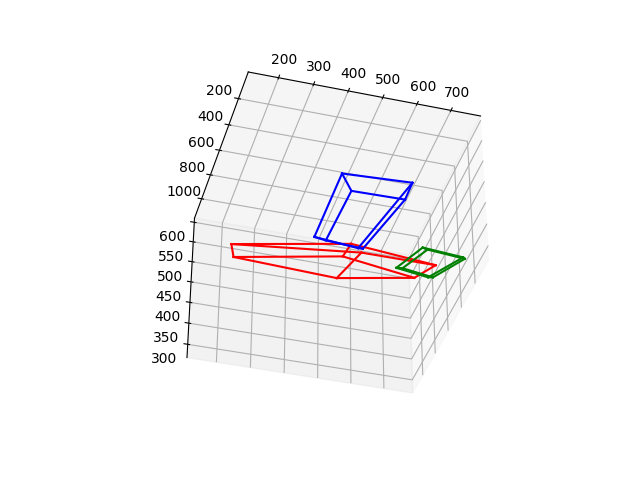

In [86]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for ivica in iviceModem:
    ax.plot3D([rekonstruisane400[ivica[0] - 1][0], rekonstruisane400[ivica[1] - 1][0]], [rekonstruisane400[ivica[0] - 1][1], rekonstruisane400[ivica[1] - 1][1]], [rekonstruisane400[ivica[0] - 1][2], rekonstruisane400[ivica[1] - 1][2]], 'red')

for ivica in iviceCaj:
    ax.plot3D([rekonstruisane400[ivica[0] - 1][0], rekonstruisane400[ivica[1] - 1][0]], [rekonstruisane400[ivica[0] - 1][1], rekonstruisane400[ivica[1] - 1][1]], [rekonstruisane400[ivica[0] - 1][2], rekonstruisane400[ivica[1] - 1][2]], 'blue')

for ivica in iviceKeks:
    ax.plot3D([rekonstruisane400[ivica[0] - 1][0], rekonstruisane400[ivica[1] - 1][0]], [rekonstruisane400[ivica[0] - 1][1], rekonstruisane400[ivica[1] - 1][1]], [rekonstruisane400[ivica[0] - 1][2], rekonstruisane400[ivica[1] - 1][2]], 'green')